# Utkarsh Shrivastav (Analysis of EEG data using advanced Deep learning techniques)

# Installing MNE and Importing the required Modules for loading the data

In [1]:
!pip install mne


[notice] A new release of pip is available: 24.0 -> 24.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [40]:
# Required Imports
from glob import glob
import numpy as np
import matplotlib.pyplot as plt
import mne
from mne.time_frequency import psd_array_multitaper
import os

In [3]:
!pip install pandas 


[notice] A new release of pip is available: 24.0 -> 24.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


# Loading the EGG dataset to notebook downloaded on local device

In [2]:
# Directory path on local device
import pandas as pd
directory_path = r'C:\Users\UTKARSH\Downloads\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0'

In [3]:
# Loading the suject info of the 36 subjects 
file_path = r"C:\Users\UTKARSH\Downloads\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\subject-info.csv"

# Reading the CSV file into a DataFrame
subject_info_df = pd.read_csv(file_path)

In [6]:
subject_info_df

,Subject,Age,Gender,Recording year,Number of subtractions,Count quality
0,Subject00,21,F,2011,9.70,0
1,Subject01,18,F,2011,29.35,1
2,Subject02,19,F,2012,12.88,1
3,Subject03,17,F,2010,31.00,1
4,Subject04,17,F,2010,8.60,0
5,Subject05,16,F,2010,20.71,1
6,Subject06,18,M,2011,4.35,0
7,Subject07,18,F,2012,13.38,1
8,Subject08,26,M,2011,18.24,1
9,Subject09,16,F,2010,7.00,0


In [4]:
# Total number of edf (europiean data format ) files in the directory , 36 Rest and 36 Task
import os
import mne
directory_path = r'C:\Users\UTKARSH\Downloads\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0'
edf_files = [os.path.join(directory_path, f) for f in os.listdir(directory_path) if f.endswith('.edf')]
print(len(edf_files))

72


In [5]:
raw_data = []  # All the data of 72 files is in this list
successful_count = 0
failure_count = 0
for file_path in edf_files:
    try:
        # Load each file
        data = mne.io.read_raw_edf(file_path, preload=True)
        raw_data.append(data)  
        successful_count = successful_count + 1
    except Exception as e:
        failure_count = failure_count + 1

Extracting EDF parameters from C:\Users\UTKARSH\Downloads\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\Subject00_1.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 90999  =      0.000 ...   181.998 secs...
Extracting EDF parameters from C:\Users\UTKARSH\Downloads\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\Subject00_2.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 30999  =      0.000 ...    61.998 secs...
Extracting EDF parameters from C:\Users\UTKARSH\Downloads\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\Subject01_1.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 90999  =      0.000 ...   181.998 secs...
Extracting EDF parameters from C:\Users\UTKARSH\Downloads\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-dur

In [6]:
print(f"Successfully loded {successful_count} files.")
print(f"Failed to load {failure_count} files.")

Successfully loded 72 files.
Failed to load 0 files.


# Organising data in proper way under the list named data, length of data is 36 , it contains 36 lists inside it , each list conatin [Rest,Task] state from subject 00 to 35


In [10]:
data = [] # Organised data 
for i in range(0,len(raw_data),2):
    x = [raw_data[i],raw_data[i+1]]
    data.append(x)
    x = []

In [11]:
len(data) # data of 36 subjects

36

In [12]:
print(type(data[0])) # List containing [rest,task] of subject_00
print(type(data[0][0])) # Class 'mne.io.edf.edf.RawEDF' , 0 index is subjected to rest state and 1 index is subjected to task
print(data[0][0]) # Rest
print(data[0][1]) # Task

<class 'list'>
<class 'mne.io.edf.edf.RawEDF'>
<RawEDF | Subject00_1.edf, 21 x 91000 (182.0 s), ~14.6 MB, data loaded>
<RawEDF | Subject00_2.edf, 21 x 31000 (62.0 s), ~5.0 MB, data loaded>


In [13]:
data[0][0].info # info of a file which is in edf format , this is how edf file looks like

Measurement date,"January 01, 2011 00:00:00 GMT"
Experimenter,Unknown
Participant,0
Digitized points,Not available
Good channels,21 EEG
Bad channels,None
EOG channels,Not available
ECG channels,Not available
Sampling frequency,500.00 Hz
Highpass,0.50 Hz
Lowpass,45.00 Hz


In [14]:
# Accessing the first loaded dataset
print(data[0][0].info)

<Info | 8 non-empty values
 bads: []
 ch_names: EEG Fp1, EEG Fp2, EEG F3, EEG F4, EEG F7, EEG F8, EEG T3, EEG ...
 chs: 21 EEG
 custom_ref_applied: False
 highpass: 0.5 Hz
 lowpass: 45.0 Hz
 meas_date: 2011-01-01 00:00:00 UTC
 nchan: 21
 projs: []
 sfreq: 500.0 Hz
 subject_info: 4 items (dict)
>


In [15]:
data[:5]

[[<RawEDF | Subject00_1.edf, 21 x 91000 (182.0 s), ~14.6 MB, data loaded>,
  <RawEDF | Subject00_2.edf, 21 x 31000 (62.0 s), ~5.0 MB, data loaded>],
 [<RawEDF | Subject01_1.edf, 21 x 91000 (182.0 s), ~14.6 MB, data loaded>,
  <RawEDF | Subject01_2.edf, 21 x 31000 (62.0 s), ~5.0 MB, data loaded>],
 [<RawEDF | Subject02_1.edf, 21 x 91000 (182.0 s), ~14.6 MB, data loaded>,
  <RawEDF | Subject02_2.edf, 21 x 31000 (62.0 s), ~5.0 MB, data loaded>],
 [<RawEDF | Subject03_1.edf, 21 x 91000 (182.0 s), ~14.6 MB, data loaded>,
  <RawEDF | Subject03_2.edf, 21 x 31000 (62.0 s), ~5.0 MB, data loaded>],
 [<RawEDF | Subject04_1.edf, 21 x 85000 (170.0 s), ~13.6 MB, data loaded>,
  <RawEDF | Subject04_2.edf, 21 x 31000 (62.0 s), ~5.0 MB, data loaded>]]

Using matplotlib as 2D backend.


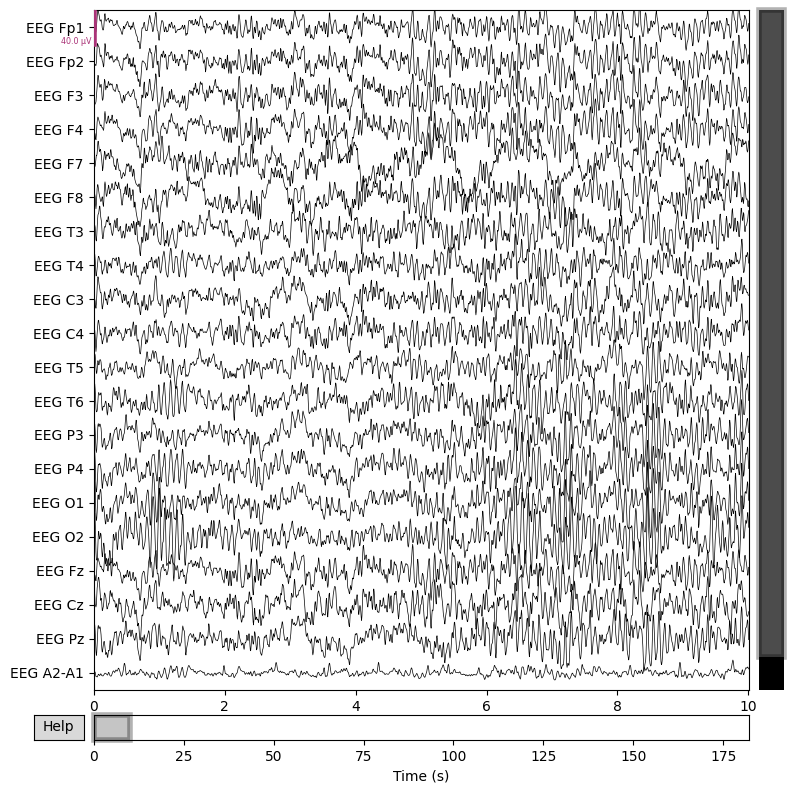

Figure(800x800)


In [16]:
# Plotting the data to visually inspect it
print(data[0][0].plot())


In [17]:
type(data[1][0]) # Knowing the datatype 

mne.io.edf.edf.RawEDF

In [18]:
# Focus on the following frequency bands: Delta (1-4
# Hz), Theta (4-8 Hz), Alpha (8-12 Hz), Beta (12-30 Hz), and Gamma (30-100
# Hz).

bands = {
    'Delta': (1, 4),
    'Theta': (4, 8),
    'Alpha': (8, 12),
    'Beta': (12, 30),
    'Gamma': (30, 100)
}

In [19]:
# Seeing the loop  in bands to use it further functions
for band, (fmin, fmax) in bands.items():
    print(band , (fmin , fmax))

Delta (1, 4)
Theta (4, 8)
Alpha (8, 12)
Beta (12, 30)
Gamma (30, 100)


In [20]:
def calculate_psd_pair(eeg_pair, fmin=1, fmax=100):
    """
    The function returns a dictionary containing the PSD data for both the rest and task states of the EEG recording, and an array of the corresponding frequencies
    Each band array holds PSD values corresponding to the average power density in that frequency band across the EEG channels:
    Each value in this array represents the mean power density (in units squared per Hz) for the Delta band, averaged across all EEG channels for one recording. The values are very small because power in these bands is distributed across a spectrum, and because of the square of the voltage measurement in power calculations.
    
    Parameters:
    eeg_pair is list - [Rest , Task] of any subject in edf form , one input of egg_pair is data[0] etc.
    
    """    
    
    bands = {
        'Delta': (1, 4),
        'Theta': (4, 8),
        'Alpha': (8, 12),
        'Beta': (12, 30),
        'Gamma': (30, 100)
    }

    psd_results = {}

    for label, eeg_data in zip(['Rest', 'Task'], eeg_pair):
        # Compute the spectral data using the compute_psd method
        spectrum = eeg_data.compute_psd(method='welch', fmin=fmin, fmax=fmax)
        
        # Extract data and frequencies from the spectrum object
        psd, freqs = spectrum.get_data(return_freqs=True)
        
        # Store PSD for each band
        psd_results[label] = {}
        for band, (fmin_band, fmax_band) in bands.items():
            idx_band = np.logical_and(freqs >= fmin_band, freqs <= fmax_band)
            psd_results[label][band] = psd[:, idx_band].mean(axis=1)
    
    return psd_results

In [21]:
def calculate_psd_pair_mean(eeg_pair, fmin=1, fmax=100):
    
    """
        Calculate the mean Power Spectral Density (PSD) for predefined frequency bands
        from EEG data during 'Rest' and 'Task' states.

        This function processes a pair of EEG recordings for a single subject, one recorded
        during a resting state and the other during a task. It computes the PSD for each state
        using Welch's method across specified frequency bands and returns the mean PSD values
        for each band and state.

        Parameters:
        eeg_pair is list - [Rest , Task] of any subject in edf form , one input of egg_pair is data[0] etc.
        """
    
    bands = {
        'Delta': (1, 4),
        'Theta': (4, 8),
        'Alpha': (8, 12),
        'Beta': (12, 30),
        'Gamma': (30, 100)
    }

    psd_results = {}

    for label, eeg_data in zip(['Rest', 'Task'], eeg_pair):
        # Compute the spectral data using the compute_psd method
        spectrum = eeg_data.compute_psd(method='welch', fmin=fmin, fmax=fmax)
        
        # Extract data and frequencies from the spectrum object
        psd, freqs = spectrum.get_data(return_freqs=True)
        
        # Store PSD for each band
        psd_results[label] = {}
        for band, (fmin_band, fmax_band) in bands.items():
            idx_band = np.logical_and(freqs >= fmin_band, freqs <= fmax_band)
            # Calculate the mean across all electrodes for each frequency band and then take the mean of these values
            psd_results[label][band] = np.mean(psd[:, idx_band], axis=1).mean()

    return psd_results

In [22]:
calculate_psd_pair(data[0]) # Testing the function on data[0]

Effective window size : 4.096 (s)
Effective window size : 4.096 (s)


{'Rest': {'Delta': array([5.58688928e-12, 8.46429747e-12, 9.28238123e-12, 1.03892356e-11,
         1.72421417e-11, 1.16535898e-11, 1.29040982e-11, 7.97123270e-12,
         1.18455432e-11, 1.00203450e-11, 9.88673705e-12, 9.10062418e-12,
         8.34236452e-12, 9.16268523e-12, 8.58753429e-12, 1.04116124e-11,
         1.02724567e-11, 2.09339344e-11, 9.82325958e-12, 1.39496697e-12,
         2.12731942e-09]),
  'Theta': array([2.28676821e-12, 2.96430789e-12, 3.79459091e-12, 4.49629232e-12,
         3.97791634e-12, 3.57250316e-12, 4.86329448e-12, 3.14476490e-12,
         3.81608915e-12, 4.51428655e-12, 2.61017361e-12, 3.04536488e-12,
         3.35995048e-12, 3.64947778e-12, 3.50358649e-12, 3.97628677e-12,
         4.47720388e-12, 5.62931609e-12, 3.62718985e-12, 3.72353642e-13,
         8.19471376e-10]),
  'Alpha': array([7.98436168e-12, 9.73123175e-12, 1.26533276e-11, 1.28018061e-11,
         8.53339114e-12, 9.20422013e-12, 1.06869645e-11, 1.05107578e-11,
         1.12460711e-11, 1.09961171

In [23]:
calculate_psd_pair_mean(data[0]) # Testing the function on data[0]

Effective window size : 4.096 (s)
Effective window size : 4.096 (s)


{'Rest': {'Delta': np.float64(1.1098073112978622e-10),
  'Theta': np.float64(4.243586159484274e-11),
  'Alpha': np.float64(4.6217049997121295e-11),
  'Beta': np.float64(8.82424100875858e-12),
  'Gamma': np.float64(5.60935859810025e-14)},
 'Task': {'Delta': np.float64(5.909844646564729e-11),
  'Theta': np.float64(3.654851070010193e-11),
  'Alpha': np.float64(5.366173734322738e-11),
  'Beta': np.float64(9.902899949449655e-12),
  'Gamma': np.float64(7.457442628684502e-14)}}

In [24]:
psd_mean_dict = {} # Will use this to create seperate frames for delta , theta , alpha , beta , gamma
for i in range(0,36):
    psd_mean_dict[f"Subject_{i}"] = calculate_psd_pair_mean(data[i])
    

Effective window size : 4.096 (s)
Effective window size : 4.096 (s)
Effective window size : 4.096 (s)
Effective window size : 4.096 (s)
Effective window size : 4.096 (s)
Effective window size : 4.096 (s)
Effective window size : 4.096 (s)
Effective window size : 4.096 (s)
Effective window size : 4.096 (s)
Effective window size : 4.096 (s)
Effective window size : 4.096 (s)
Effective window size : 4.096 (s)
Effective window size : 4.096 (s)
Effective window size : 4.096 (s)
Effective window size : 4.096 (s)
Effective window size : 4.096 (s)
Effective window size : 4.096 (s)
Effective window size : 4.096 (s)
Effective window size : 4.096 (s)
Effective window size : 4.096 (s)
Effective window size : 4.096 (s)
Effective window size : 4.096 (s)
Effective window size : 4.096 (s)
Effective window size : 4.096 (s)
Effective window size : 4.096 (s)
Effective window size : 4.096 (s)
Effective window size : 4.096 (s)
Effective window size : 4.096 (s)
Effective window size : 4.096 (s)
Effective wind

In [25]:
psd_mean_dict

{'Subject_0': {'Rest': {'Delta': np.float64(1.1098073112978622e-10),
   'Theta': np.float64(4.243586159484274e-11),
   'Alpha': np.float64(4.6217049997121295e-11),
   'Beta': np.float64(8.82424100875858e-12),
   'Gamma': np.float64(5.60935859810025e-14)},
  'Task': {'Delta': np.float64(5.909844646564729e-11),
   'Theta': np.float64(3.654851070010193e-11),
   'Alpha': np.float64(5.366173734322738e-11),
   'Beta': np.float64(9.902899949449655e-12),
   'Gamma': np.float64(7.457442628684502e-14)}},
 'Subject_1': {'Rest': {'Delta': np.float64(5.0944670238608954e-11),
   'Theta': np.float64(2.1069733077745335e-11),
   'Alpha': np.float64(1.4795169952408154e-11),
   'Beta': np.float64(3.421524403355647e-12),
   'Gamma': np.float64(1.403730114186065e-13)},
  'Task': {'Delta': np.float64(6.082792240801813e-11),
   'Theta': np.float64(1.5185084479168213e-11),
   'Alpha': np.float64(1.0936232280309845e-11),
   'Beta': np.float64(3.033246398578443e-12),
   'Gamma': np.float64(1.9951993715430813e-1

In [26]:
data_list = []
for subject, details in psd_mean_dict.items():
    row = {
        'Subject': subject,
        **{f'Rest_{band}': values for band, values in details['Rest'].items()},
        **{f'Task_{band}': values for band, values in details['Task'].items()}
    }
    data_list.append(row)

# Create DataFrame , one type of data frame (Maybe used in future , just created once)
df_1 = pd.DataFrame(data_list)

In [27]:
df_1

,Subject,Rest_Delta,Rest_Theta,Rest_Alpha,Rest_Beta,Rest_Gamma,Task_Delta,Task_Theta,Task_Alpha,Task_Beta,Task_Gamma
0,Subject_0,1.109807e-10,4.243586e-11,4.621705e-11,8.824241e-12,5.609359e-14,5.909845e-11,3.654851e-11,5.366174e-11,9.902900e-12,7.457443e-14
1,Subject_1,5.094467e-11,2.106973e-11,1.479517e-11,3.421524e-12,1.403730e-13,6.082792e-11,1.518508e-11,1.093623e-11,3.033246e-12,1.995199e-13
2,Subject_2,1.675067e-11,3.398685e-12,7.427257e-12,1.489205e-12,8.460580e-14,6.709078e-11,1.865420e-11,1.451773e-11,8.611955e-12,3.286526e-13
3,Subject_3,2.551990e-11,1.654830e-11,2.309140e-11,3.442746e-12,7.960586e-14,2.529648e-11,1.428243e-11,1.442200e-11,3.436464e-12,9.404087e-14
4,Subject_4,6.874849e-11,1.726916e-11,1.988230e-11,5.491751e-12,1.933519e-13,5.567123e-11,1.783713e-11,1.620706e-11,5.425381e-12,6.739080e-14
5,Subject_5,1.102200e-10,4.545167e-11,4.397827e-11,1.725844e-11,2.238509e-13,1.108898e-10,3.641098e-11,4.269103e-11,1.845726e-11,2.344315e-13
6,Subject_6,6.304155e-11,1.591085e-11,1.146825e-11,5.339939e-12,6.280120e-14,4.844773e-11,1.297580e-11,9.225360e-12,4.425698e-12,7.759316e-14
7,Subject_7,2.802298e-11,1.038171e-11,1.489383e-11,3.123709e-12,2.178890e-13,3.193736e-11,7.465501e-12,1.165937e-11,3.023285e-12,2.436347e-13
8,Subject_8,1.510406e-10,7.780817e-11,5.665545e-11,1.894345e-11,9.578799e-14,1.058423e-10,1.012005e-10,5.734142e-11,2.137086e-11,9.350035e-14
9,Subject_9,1.106918e-10,4.254159e-11,4.450756e-11,2.302704e-11,3.291200e-13,9.312927e-11,4.048136e-11,5.044543e-11,2.452603e-11,3.484707e-13


In [28]:
data_list = [] # Main dataframe that will be used for anaylysis of mean psds over different frequency brands averaged over all 21 channels

columns = pd.MultiIndex.from_product(
    [['Delta', 'Theta', 'Alpha', 'Beta', 'Gamma'], ['Rest', 'Task']],
    names=['Band', 'Condition']
)

# Iterate over each subject in the dictionary
for subject, details in psd_mean_dict.items():
    # Extract values for rest and task, format them in order for the DataFrame
    row = []
    for band in ['Delta', 'Theta', 'Alpha', 'Beta', 'Gamma']:
        row.extend([details['Rest'].get(band, None), details['Task'].get(band, None)])
    data_list.append(row)

# Create DataFrame with subject names as index
df = pd.DataFrame(data_list, columns=columns, index=[f"Subject_{i}" for i in range(len(psd_mean_dict))])

In [29]:
df

Band               Delta                       Theta                \
Condition           Rest          Task          Rest          Task   
Subject_0   1.109807e-10  5.909845e-11  4.243586e-11  3.654851e-11   
Subject_1   5.094467e-11  6.082792e-11  2.106973e-11  1.518508e-11   
Subject_2   1.675067e-11  6.709078e-11  3.398685e-12  1.865420e-11   
Subject_3   2.551990e-11  2.529648e-11  1.654830e-11  1.428243e-11   
Subject_4   6.874849e-11  5.567123e-11  1.726916e-11  1.783713e-11   
Subject_5   1.102200e-10  1.108898e-10  4.545167e-11  3.641098e-11   
Subject_6   6.304155e-11  4.844773e-11  1.591085e-11  1.297580e-11   
Subject_7   2.802298e-11  3.193736e-11  1.038171e-11  7.465501e-12   
Subject_8   1.510406e-10  1.058423e-10  7.780817e-11  1.012005e-10   
Subject_9   1.106918e-10  9.312927e-11  4.254159e-11  4.048136e-11   
Subject_10  6.756265e-11  7.012347e-11  3.807648e-11  3.948905e-11   
Subject_11  6.232820e-10  2.458477e-11  6.028211e-11  4.105611e-11   
Subject_12  1.281234e-10  1.181170e-10  4.592788e-11  4.133971e-11   
Subject_13  7.399022e-12  3.692499e-11  2.768173e-12  2.207683e-11   
Subject_14  8.988889e-11  7.520867e-11  2.108081e-11  2.059328e-11   
Subject_15  9.934089e-11  1.026293e-10  2.143487e-11  2.139225e-11   
Subject_16  2.753297e-11  2.738899e-11  3.761753e-11  2.628795e-11   
Subject_17  4.505329e-11  5.071799e-11  1.858698e-11  2.447283e-11   
Subject_18  8.949799e-11  4.326313e-11  9.370634e-11  7.812731e-11   
Subject_19  5.793611e-11  5.847233e-11  1.890723e-11  2.524355e-11   
Subject_20  5.986349e-11  1.156549e-11  1.495504e-11  4.976739e-12   
Subject_21  1.017716e-10  6.508127e-11  4.387476e-11  3.268210e-11   
Subject_22  6.684207e-11  3.438647e-11  3.170688e-11  2.360100e-11   
Subject_23  2.101239e-11  2.350774e-11  1.947523e-11  1.570962e-11   
Subject_24  8.439318e-11  8.680586e-11  2.376826e-11  2.497186e-11   
Subject_25  7.345204e-11  7.257502e-11  3.791791e-11  2.955533e-11   
Subject_26  6.712999e-11  5.544185e-11  2.290406e-11  2.366056e-11   
Subject_27  6.853200e-11  8.244270e-11  5.425332e-11  6.369441e-11   
Subject_28  3.999975e-11  3.373776e-11  1.101091e-11  9.208326e-12   
Subject_29  1.039873e-10  8.745397e-11  2.840294e-11  3.119964e-11   
Subject_30  2.649595e-11  2.767633e-11  3.057509e-11  3.455431e-11   
Subject_31  7.942195e-11  8.139695e-11  2.386668e-11  2.260599e-11   
Subject_32  6.817405e-11  4.743360e-11  2.819122e-11  3.300168e-11   
Subject_33  2.325975e-11  2.055654e-11  4.961995e-12  3.663919e-12   
Subject_34  6.698057e-11  5.028031e-11  2.122251e-11  2.490590e-11   
Subject_35  8.580137e-11  1.058212e-11  1.878233e-11  4.684856e-12   

Band               Alpha                        Beta                \
Condition           Rest          Task          Rest          Task   
Subject_0   4.621705e-11  5.366174e-11  8.824241e-12  9.902900e-12   
Subject_1   1.479517e-11  1.093623e-11  3.421524e-12  3.033246e-12   
Subject_2   7.427257e-12  1.451773e-11  1.489205e-12  8.611955e-12   
Subject_3   2.309140e-11  1.442200e-11  3.442746e-12  3.436464e-12   
Subject_4   1.988230e-11  1.620706e-11  5.491751e-12  5.425381e-12   
Subject_5   4.397827e-11  4.269103e-11  1.725844e-11  1.845726e-11   
Subject_6   1.146825e-11  9.225360e-12  5.339939e-12  4.425698e-12   
Subject_7   1.489383e-11  1.165937e-11  3.123709e-12  3.023285e-12   
Subject_8   5.665545e-11  5.734142e-11  1.894345e-11  2.137086e-11   
Subject_9   4.450756e-11  5.044543e-11  2.302704e-11  2.452603e-11   
Subject_10  2.165649e-11  2.562095e-11  1.094502e-11  1.236712e-11   
Subject_11  2.533582e-11  2.460303e-11  1.415473e-11  1.467784e-11   
Subject_12  2.375440e-11  3.565757e-11  9.943166e-12  1.007669e-11   
Subject_13  1.382902e-12  1.435917e-11  3.793226e-13  4.776128e-12   
Subject_14  1.448466e-11  1.650995e-11  6.920783e-12  9.713166e-12   
Subject_15  3.817979e-11  2.485112e-11  8.908449e-12  9.197183e-12   
Subject_16  2.240489e-11  2.367071e-11  3.735709e-12  4.015111e-12   
Subject_1

In [30]:
# Creating all kinds of dataframes for all freqeuncy bands seprately for plotting them individudally , they contain values for rest and task state of subjects averaged over 21 channels
df_delta = df['Delta']
df_theta = df['Theta']
df_alpha = df['Alpha']
df_beta = df['Beta']
df_gamma = df['Gamma']

In [31]:
def plot_band_psd(df_band, band_name):
    """
    Plots the PSD values for 'Rest' and 'Task' from a given DataFrame for a specific band.

    Parameters:
    - df_band: DataFrame containing 'Rest' and 'Task' PSD values.
    - band_name: String representing the name of the band (e.g., 'Delta', 'Theta').
    """
    # Assuming df_delta is already defined and available
    data_frame = df_band  # This is your DataFrame for the Delta band
    band_name = band_name  # Specifying the band name you want to plot

    # Create a single plot for the Delta band
    fig, ax = plt.subplots(figsize=(10, 4))  # Adjusting the size for a single subplot
    colors = {'Rest': 'skyblue', 'Task': 'salmon'}

    # Plotting Rest and Task data
    data_frame['Rest'].plot(kind='bar', color=colors['Rest'], ax=ax, position=0, width=0.4, label='Rest')
    data_frame['Task'].plot(kind='bar', color=colors['Task'], ax=ax, position=1, width=0.4, label='Task')

    ax.set_title(f'{band_name} Band Power Spectral Density')
    ax.set_xlabel('Subjects')
    ax.set_ylabel('PSD Values')
    ax.legend()

    plt.tight_layout()
    plt.show()

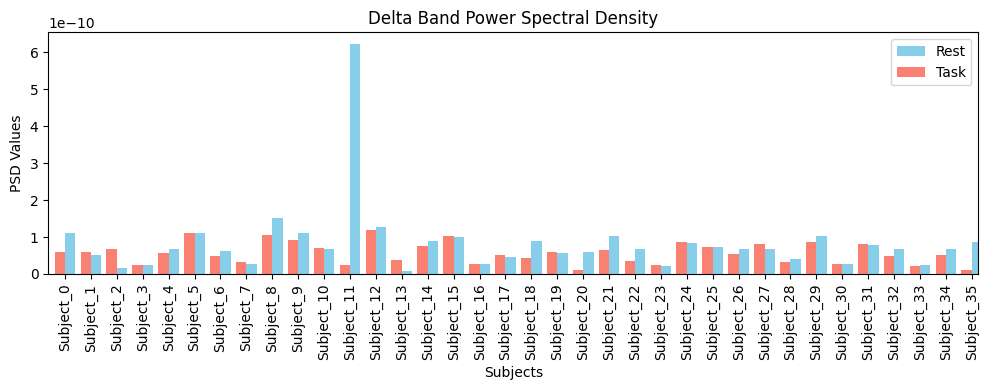

In [32]:
plot_band_psd(df_delta,'Delta') # Delta Plot

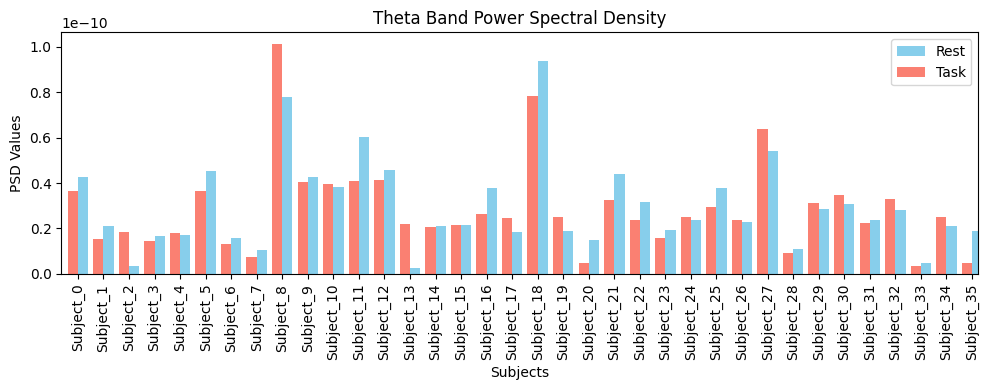

In [33]:
plot_band_psd(df_theta,'Theta') # Theta Plot

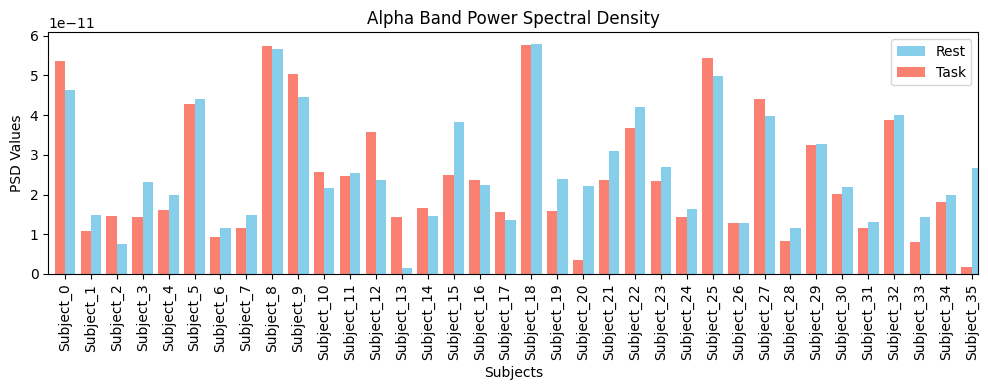

In [34]:
plot_band_psd(df_alpha,'Alpha') # Alpha Plot

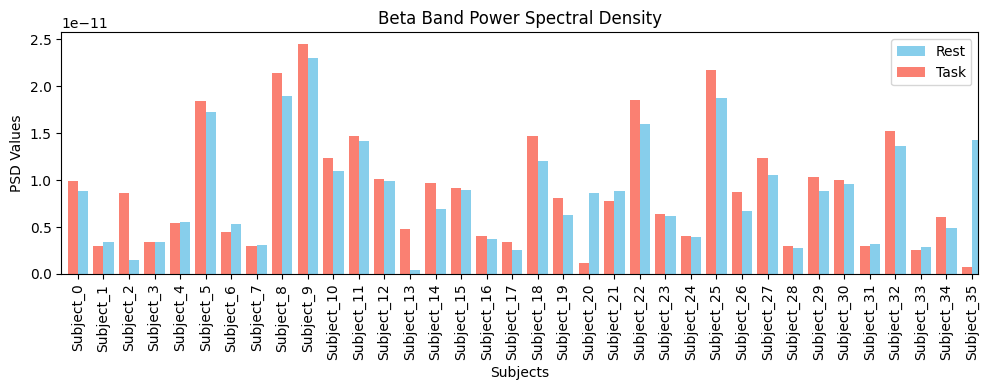

In [35]:
plot_band_psd(df_beta,'Beta') # Beta Plot

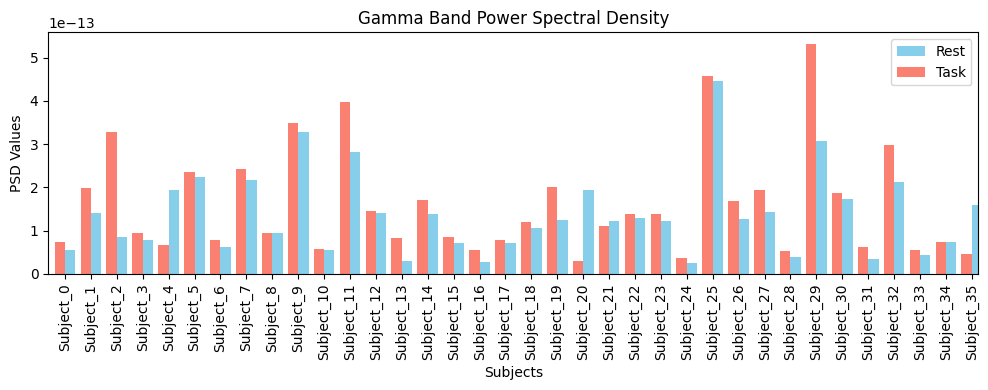

In [36]:
plot_band_psd(df_gamma,'Gamma') # Gamma Plot

In [37]:
calculate_psd_pair(data[0])['Rest']['Delta'] # analysing the 21 values across the channels individually for one of the datapoint , in this case of subject 0 at rest state and it's delta frequency band
# Also a method how to fetch all 21 values of 21 channels of any subject , at any state and any frequency band.

Effective window size : 4.096 (s)
Effective window size : 4.096 (s)


array([5.58688928e-12, 8.46429747e-12, 9.28238123e-12, 1.03892356e-11,
       1.72421417e-11, 1.16535898e-11, 1.29040982e-11, 7.97123270e-12,
       1.18455432e-11, 1.00203450e-11, 9.88673705e-12, 9.10062418e-12,
       8.34236452e-12, 9.16268523e-12, 8.58753429e-12, 1.04116124e-11,
       1.02724567e-11, 2.09339344e-11, 9.82325958e-12, 1.39496697e-12,
       2.12731942e-09])

In [38]:
len(calculate_psd_pair(data[0])['Rest']['Delta']) # The length is correct 21 channels

Effective window size : 4.096 (s)
Effective window size : 4.096 (s)


21

In [39]:
def plot_psd_comparison_single_subject(psd_results):
    
    """
    Plots a comparison of mean Power Spectral Density (PSD) values across different EEG frequency bands 
    between 'Rest' and 'Task' states for a single subject.

    This function generates a bar chart where each bar represents the mean PSD value for a specific 
    frequency band during 'Rest' and 'Task' conditions. The plot is particularly useful for visualizing 
    differences in brain activity across different conditions and frequency bands.

    Parameters:
    - psd_results (dict): A dictionary containing the PSD data structured with top-level keys 'Rest' 
      and 'Task', each mapping to a dictionary of frequency bands ('Delta', 'Theta', 'Alpha', 'Beta', 
      'Gamma') with their corresponding mean PSD values.    
      
      """

    bands = psd_results['Rest'].keys()  # Assuming band keys are the same for Rest and Task
    colors = ['skyblue', 'salmon']  # Colors for Rest and Task bars
    band_labels = list(bands)
    n_bands = len(band_labels)
    
    fig, ax = plt.subplots(figsize=(12, 8))
    
    # Width of a bar
    bar_width = 0.35
    # Setting the positions of the bars
    index = np.arange(n_bands)
    
    # Creating bars for each band
    rest_means = [psd_results['Rest'][band].mean() for band in bands]
    task_means = [psd_results['Task'][band].mean() for band in bands]
    bars1 = ax.bar(index - bar_width/2, rest_means, bar_width, label='Rest', color=colors[0])
    bars2 = ax.bar(index + bar_width/2, task_means, bar_width, label='Task', color=colors[1])

    ax.set_xlabel('Frequency Band')
    ax.set_ylabel('Mean PSD (Power/Hz)')
    ax.set_title('Comparison of Mean Power Spectral Density (PSD) Across Frequency Bands')
    ax.set_xticks(index)
    ax.set_xticklabels(band_labels)
    ax.legend()

    # Log scale for the y-axis
    ax.set_yscale('log')
    # Set a minimum limit to avoid log(0) issue, ensuring all data is visible
    min_val = min(min(rest_means), min(task_means))
    if min_val > 0:
        ax.set_ylim(min_val / 10, max(max(rest_means), max(task_means)) * 10)
    else:
        ax.set_ylim(1e-12, max(max(rest_means), max(task_means)) * 10)

    # Adding value labels on top of each bar
    for bars in (bars1, bars2):
        for bar in bars:
            yval = bar.get_height()
            # Adjust text position for visibility on log scale
            ax.text(bar.get_x() + bar.get_width()/2, yval * 1.1, f'{yval:.2e}', ha='center', va='bottom', fontsize=9, color='black')

    plt.show()

# Implement binary classification using any EGGNET Deep learning Model

In [4]:
pip install tf-keras



[notice] A new release of pip is available: 24.0 -> 24.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip



   ---------------------------------------- 0.0/1.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.7 MB ? eta -:--:--
    --------------------------------------- 0.0/1.7 MB 325.1 kB/s eta 0:00:06
   - -------------------------------------- 0.1/1.7 MB 409.6 kB/s eta 0:00:05
   --- ------------------------------------ 0.1/1.7 MB 714.4 kB/s eta 0:00:03
   ----- ---------------------------------- 0.2/1.7 MB 1.1 MB/s eta 0:00:02
   -------- ------------------------------- 0.3/1.7 MB 1.3 MB/s eta 0:00:02
   ------------- -------------------------- 0.6/1.7 MB 1.8 MB/s eta 0:00:01
   ----------------- ---------------------- 0.8/1.7 MB 2.1 MB/s eta 0:00:01
   ----------------------- ---------------- 1.0/1.7 MB 2.5 MB/s eta 0:00:01
   ------------------------------ --------- 1.3/1.7 MB 2.9 MB/s eta 0:00:01
   ------------------------------------ --- 1.6/1.7 MB 3.2 MB/s eta 0:00:01
   -----------------------

In [4]:
pip install tensorflow keras mne



[notice] A new release of pip is available: 24.0 -> 24.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [16]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the CSV file
file_path = r"C:\Users\UTKARSH\Downloads\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\subject-info.csv"  # Replace with your file path
data = pd.read_csv(file_path)

# Convert 'Gender' column to numeric
label_encoder = LabelEncoder()
data['Gender'] = label_encoder.fit_transform(data['Gender'])

# Define features and target
X = data[['Age', 'Gender', 'Recording year', 'Number of subtractions']]
y = data['Count quality']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Display the shapes of the training and testing sets
print('Training features shape:', X_train.shape)
print('Testing features shape:', X_test.shape)
print('Training target shape:', y_train.shape)
print('Testing target shape:', y_test.shape)

# You can now use X_train_scaled, X_test_scaled, y_train, and y_test to train your deep learning model


Training features shape: (28, 4)
Testing features shape: (8, 4)
Training target shape: (28,)
Testing target shape: (8,)


In [2]:
%pip install tensorflow keras
%pip install einops # For Vision Transformer


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.


ERROR: Invalid requirement: '#'

[notice] A new release of pip is available: 24.0 -> 24.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [23]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the CSV file
file_path = r"C:\Users\UTKARSH\Downloads\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\subject-info.csv"  # Replace with your file path
data = pd.read_csv(file_path)

# Convert 'Gender' column to numeric
label_encoder = LabelEncoder()
data['Gender'] = label_encoder.fit_transform(data['Gender'])

# Define features and target
X = data[['Age', 'Gender', 'Recording year', 'Number of subtractions']]
y = data['Count quality']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [25]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, BatchNormalization, DepthwiseConv2D, AveragePooling2D, Dropout, Flatten, Dense

def EEGNet(nb_classes, Chans=1, Samples=4, dropoutRate=0.5):
    input1 = Input(shape=(Chans, Samples, 1))

    block1 = Conv2D(16, (1, 4), padding='same')(input1)  # Adjusted kernel size
    block1 = BatchNormalization()(block1)
    block1 = DepthwiseConv2D((Chans, 1), use_bias=False, depth_multiplier=2, depthwise_constraint=tf.keras.constraints.max_norm(1.))(block1)
    block1 = BatchNormalization()(block1)
    block1 = AveragePooling2D((1, 2))(block1)  # Adjusted pool size
    block1 = Dropout(dropoutRate)(block1)

    block2 = DepthwiseConv2D((1, 2), use_bias=False, depth_multiplier=2, padding='same', depthwise_constraint=tf.keras.constraints.max_norm(1.))(block1)  # Adjusted kernel size
    block2 = BatchNormalization()(block2)
    block2 = AveragePooling2D((1, 2))(block2)  # Adjusted pool size
    block2 = Dropout(dropoutRate)(block2)
    
    flatten = Flatten(name='flatten')(block2)

    dense = Dense(nb_classes, name='dense', kernel_constraint=tf.keras.constraints.max_norm(0.25))(flatten)
    softmax = tf.keras.layers.Activation('softmax', name='softmax')(dense)

    return Model(inputs=input1, outputs=softmax)

# Reshape the data to fit the model
X_train_eegnet = X_train_scaled.reshape(X_train_scaled.shape[0], 1, X_train_scaled.shape[1], 1)
X_test_eegnet = X_test_scaled.reshape(X_test_scaled.shape[0], 1, X_test_scaled.shape[1], 1)

# Define the model
eegnet = EEGNet(nb_classes=2, Chans=1, Samples=X_train_scaled.shape[1])
eegnet.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
eegnet.fit(X_train_eegnet, y_train, epochs=100, batch_size=16, validation_data=(X_test_eegnet, y_test))


Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 9s 784ms/step - accuracy: 0.4583 - loss: 1.1966 - val_accuracy: 0.7500 - val_loss: 0.6908
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step - accuracy: 0.5476 - loss: 0.6723 - val_accuracy: 0.7500 - val_loss: 0.6890
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step - accuracy: 0.6815 - loss: 0.6644 - val_accuracy: 0.7500 - val_loss: 0.6871
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step - accuracy: 0.6369 - loss: 0.6533 - val_accuracy: 0.7500 - val_loss: 0.6852
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step - accuracy: 0.7738 - loss: 0.6343 - val_accuracy: 0.7500 - val_loss: 0.6834
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step - accuracy: 0.7292 - loss: 0.6286 - val_accuracy: 0.7500 - val_loss: 0.6816
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step - accuracy: 0.7262 - loss: 0.6250 - val_accuracy: 0.7500 - val_loss: 0.6797
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step - accuracy: 0.7292 - loss: 0.6031 - val_accuracy: 0.7500 - val_loss

# Evaluate the EEGNET model using appropriate metrics (accuracy, precision, recall, F1-score) and results.

In [38]:
import numpy as np
from sklearn.metrics import classification_report

# Assuming you already have X_test_reshaped, y_test, and tsception_model defined

# Make predictions
y_pred = eegnet.predict(X_test_eegnet)
y_pred_classes = np.argmax(y_pred, axis=1)

# Convert y_test to categorical if needed (not necessary for sparse_categorical_crossentropy)
# y_test_categorical = keras.utils.to_categorical(y_test, num_classes)

# Calculate precision, recall, F1-score
report = classification_report(y_test, y_pred_classes)

# Print the report
print("Classification Report:")
print(report)


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.75      1.00      0.86         6

    accuracy                           0.75         8
   macro avg       0.38      0.50      0.43         8
weighted avg       0.56      0.75      0.64         8



C:\Users\UTKARSH\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\UTKARSH\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\UTKARSH\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(avera

 # Implement binary classification using TSCEPTION Deep learning Model

In [34]:
# Ensure data shapes are correct
print("X_train shape:", X_train_scaled.shape)
print("X_test shape:", X_test_scaled.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)



X_train shape: (28, 4)
X_test shape: (8, 4)
y_train shape: (28,)
y_test shape: (8,)


In [35]:
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers

def create_tsception(input_shape, num_classes):
    input_layer = layers.Input(shape=input_shape)
    
    # TSCeption block
    conv1 = layers.Conv2D(32, (1, 5), padding='same')(input_layer)
    conv1 = layers.BatchNormalization()(conv1)
    conv1 = layers.Activation('relu')(conv1)
    
    conv2 = layers.Conv2D(32, (1, 10), padding='same')(input_layer)
    conv2 = layers.BatchNormalization()(conv2)
    conv2 = layers.Activation('relu')(conv2)
    
    conv3 = layers.Conv2D(32, (1, 20), padding='same')(input_layer)
    conv3 = layers.BatchNormalization()(conv3)
    conv3 = layers.Activation('relu')(conv3)
    
    concatenated = layers.Concatenate()([conv1, conv2, conv3])
    
    conv4 = layers.Conv2D(64, (1, 5), padding='same')(concatenated)
    conv4 = layers.BatchNormalization()(conv4)
    conv4 = layers.Activation('relu')(conv4)
    
    flatten = layers.Flatten()(conv4)
    
    dense1 = layers.Dense(128, activation='relu')(flatten)
    dropout = layers.Dropout(0.5)(dense1)
    output_layer = layers.Dense(num_classes, activation='softmax')(dropout)
    
    model = models.Model(inputs=input_layer, outputs=output_layer)
    return model

# Reshape input data
X_train_reshaped = X_train_scaled.reshape((X_train_scaled.shape[0], X_train_scaled.shape[1], 1, 1))
X_test_reshaped = X_test_scaled.reshape((X_test_scaled.shape[0], X_test_scaled.shape[1], 1, 1))

# Define the model
tsception_model = create_tsception((X_train_reshaped.shape[1], X_train_reshaped.shape[2], X_train_reshaped.shape[3]), 2)

# Compile the model
tsception_model.compile(optimizer=optimizers.Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
tsception_model.fit(X_train_reshaped, y_train, epochs=100, batch_size=16, validation_data=(X_test_reshaped, y_test))

# Evaluate the model
test_loss, test_accuracy = tsception_model.evaluate(X_test_reshaped, y_test)
print(f'Test Accuracy: {test_accuracy}')


Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 17s 633ms/step - accuracy: 0.5476 - loss: 0.8062 - val_accuracy: 0.7500 - val_loss: 0.6837
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 79ms/step - accuracy: 0.6369 - loss: 0.5577 - val_accuracy: 0.8750 - val_loss: 0.6746
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - accuracy: 0.9762 - loss: 0.2117 - val_accuracy: 0.8750 - val_loss: 0.6655
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step - accuracy: 0.9315 - loss: 0.1942 - val_accuracy: 0.8750 - val_loss: 0.6561
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step - accuracy: 1.0000 - loss: 0.1370 - val_accuracy: 0.8750 - val_loss: 0.6481
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 274ms/step - accuracy: 0.9524 - loss: 0.1019 - val_accuracy: 0.8750 - val_loss: 0.6405
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step - accuracy: 0.9554 - loss: 0.0894 - val_accuracy: 0.8750 - val_loss: 0.6333
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 292ms/step - accuracy: 1.0000 - loss: 0.0588 - val_accuracy: 0.8750 - val

# Evaluate the Tsception model using appropriate metrics (accuracy, precision, recall, F1-score) and results.

In [36]:
import numpy as np
from sklearn.metrics import classification_report

# Assuming you already have X_test_reshaped, y_test, and tsception_model defined

# Make predictions
y_pred = tsception_model.predict(X_test_reshaped)
y_pred_classes = np.argmax(y_pred, axis=1)

# Convert y_test to categorical if needed (not necessary for sparse_categorical_crossentropy)
# y_test_categorical = keras.utils.to_categorical(y_test, num_classes)

# Calculate precision, recall, F1-score
report = classification_report(y_test, y_pred_classes)

# Print the report
print("Classification Report:")
print(report)


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.75      1.00      0.86         6

    accuracy                           0.75         8
   macro avg       0.38      0.50      0.43         8
weighted avg       0.56      0.75      0.64         8



C:\Users\UTKARSH\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\UTKARSH\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\UTKARSH\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(avera